.<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan</font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c anaconda plotly --yes
#!conda install -c anaconda folium --yes
#!pip install folium

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import folium
import shapefile as shp

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
#Receive Data
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
filename_suffix = 'csv'

##### Read in the data and some preprocessing

In [3]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_csv("CP3a_SST_GAS_RF_data.csv", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,1_Field name,2_Reservoir unit,5_Resource uncertainty,8_Country,10_Region,11_Basin name,15_Latitude,16_Longitude,18_Hydrocarbon type (main),32_Current status year,...,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),336_Improved recovery methods (water injection optimization),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control),339_Improved recovery methods (other reservoir management),76_Pressure_Temp_depth (ft TVDSS)
0,ABADI,UPPER PLOVER,3P,INDONESIA,ASIA-PACIFIC,BONAPARTE,-9.1238,130.5000,GAS-CONDENSATE,,...,NaN,NaN,OTHER RESERVOIR MANAGEMENT,NaN,NaN,NaN,NaN,NaN,SIDETRACKING,NaN
1,ABU GHARADIG,BAHARIYA,1P,EGYPT,AFRICA,ABU GHARADIG,29.7422,28.4925,GAS-CONDENSATE,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10700.0
2,ABU MADI-EL QARA,ABU MADI (LEVEL II),1P,EGYPT,AFRICA,NILE DELTA,31.4382,31.3616,GAS,2000.0,...,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN,NaN,HIGH WATER-CUT WELL SHUT-IN/WATER PLUGGING,10300.0
3,ABU MADI-EL QARA,ABU MADI (LEVEL III),1P,EGYPT,AFRICA,NILE DELTA,31.4382,31.3616,GAS,,...,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN,NaN,HIGH WATER-CUT WELL SHUT-IN/WATER PLUGGING,11000.0
4,AGUARAGUE,HUAMAMPAMPA,1P,ARGENTINA,LATIN AMERICA,TARIJA,-22.6272,-63.8762,GAS-CONDENSATE,2000.0,...,NaN,NaN,ARTIFICIAL LIFT/OTHER RESERVOIR MANAGEMENT,NaN,NaN,NaN,GAS LIFT,NaN,SIDETRACKING/STEP-OUT DEVELOPMENT DRILLING/WAT...,12470.0


In [4]:
#Database Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   1_Field name                                                  225 non-null    object 
 1   2_Reservoir unit                                              225 non-null    object 
 2   5_Resource uncertainty                                        225 non-null    object 
 3   8_Country                                                     225 non-null    object 
 4   10_Region                                                     225 non-null    object 
 5   11_Basin name                                                 225 non-null    object 
 6   15_Latitude                                                   225 non-null    float64
 7   16_Longitude                                                  225 non-n

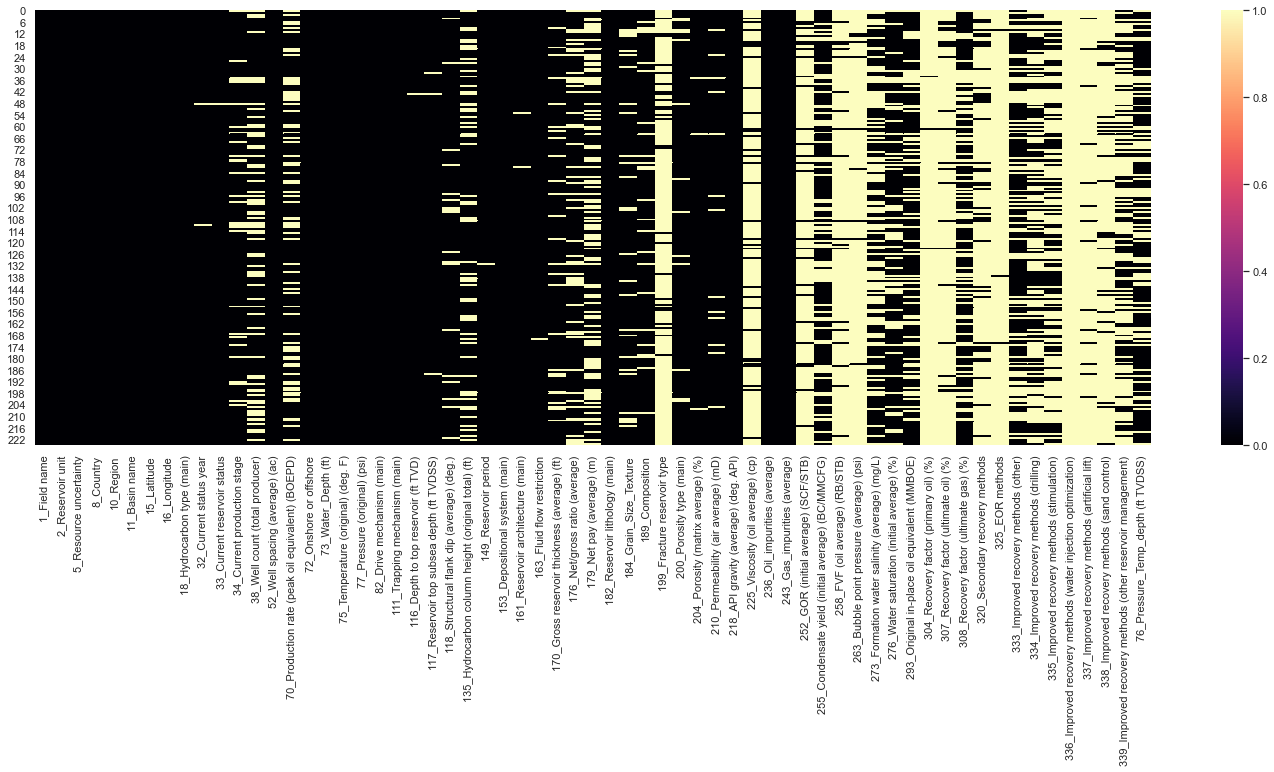

In [5]:
#Missing Values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [6]:
#Creating a base map
m = folium.Map()

for lat, lon, name in zip(df['15_Latitude'],df['16_Longitude'],df['1_Field name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
    ).add_to(m)
m

In [7]:
print(df.shape)

(225, 63)


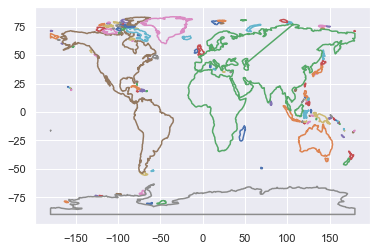

In [8]:
#%matplotlib inline
#import shapefile as shp  # Requires the pyshp package
#import matplotlib.pyplot as plt

sf = shp.Reader("ne_110m_land.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

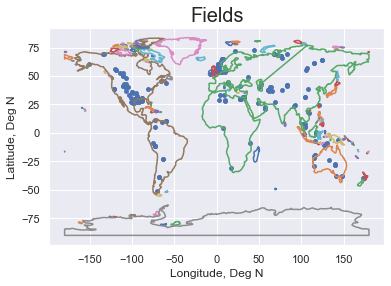

In [9]:
x = df['16_Longitude']
y = df['15_Latitude']

fig, ax = plt.subplots()
s = ax.scatter(x, y,
               color = 'b',
               s=15,
               marker='o')                   # Plot circles
               #alpha = 0.2 )
               
plt.title('Fields', fontsize = 20)
plt.ylabel('Latitude, Deg N')
plt.xlabel('Longitude, Deg N')

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [10]:
#Clean and filter database for only Oil Reservoirs with Sandstone Lithology 
dfssgas = df.copy()

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
#Null Values in Database
dfssgas.isnull().sum().sort_values(ascending=False)

336_Improved recovery methods (water injection optimization)    225
325_EOR methods                                                 222
304_Recovery factor (primary oil) (%)                           222
263_Bubble point pressure (average) (psi)                       216
337_Improved recovery methods (artificial lift)                 211
258_FVF (oil average) (RB/STB)                                  206
307_Recovery factor (ultimate oil) (%)                          204
199_Fracture reservoir type                                     199
338_Improved recovery methods (sand control)                    199
252_GOR (initial average) (SCF/STB)                             198
225_Viscosity (oil average) (cp)                                193
320_Secondary recovery methods                                  185
339_Improved recovery methods (other reservoir management)      134
335_Improved recovery methods (stimulation)                     132
334_Improved recovery methods (drilling)        

In [13]:
dfssgas.shape

(225, 63)

In [14]:
#Drop Drop Unnecessary Columns not related to gas reservoirs with sandstone lithology
dfssgas.drop(['336_Improved recovery methods (water injection optimization)', '199_Fracture reservoir type', 
              '304_Recovery factor (primary oil) (%)', '273_Formation water salinity (average) (mg/L)', 
             '189_Composition', '184_Grain_Size_Texture', '163_Fluid flow restriction', '236_Oil_impurities (average)',
             '2_Reservoir unit', '111_Trapping mechanism (main)', '243_Gas_impurities (average)', '263_Bubble point pressure (average) (psi)', 
             '258_FVF (oil average) (RB/STB)', '307_Recovery factor (ultimate oil) (%)', '252_GOR (initial average) (SCF/STB)', 
             '225_Viscosity (oil average) (cp)', '70_Production rate (peak oil equivalent) (BOEPD)', '34_Current production stage',
             '32_Current status year', '33_Current reservoir status', '5_Resource uncertainty', '8_Country', '15_Latitude', '16_Longitude', 
             '218_API gravity (average) (deg. API)', '73_Water_Depth (ft)'], axis=1, inplace=True)

In [15]:
dfssgas.shape

(225, 37)

In [16]:
#print(dfssgas['320_Secondary recovery methods'].value_counts())
#print(dfssgas['325_EOR methods'].value_counts())
#print(dfssgas['333_Improved recovery methods (other)'].value_counts())
#print(dfssgas['334_Improved recovery methods (drilling)'].value_counts())
#print(dfssgas['335_Improved recovery methods (stimulation)'].value_counts())
#print(dfssgas['336_Improved recovery methods (water injection optimization)'].value_counts())
#print(dfssgas['337_Improved recovery methods (artificial lift)'].value_counts())
#print(dfssgas['338_Improved recovery methods (sand control)'].value_counts())
#print(dfssgas['339_Improved recovery methods (other reservoir management)'].value_counts())

In [17]:
# Collapse IOR EOR 
dfEORIOR = pd.DataFrame(dfssgas, columns=['320_Secondary recovery methods', '325_EOR methods', '333_Improved recovery methods (other)',
                                         '334_Improved recovery methods (drilling)','335_Improved recovery methods (stimulation)', 
                                          '337_Improved recovery methods (artificial lift)', '338_Improved recovery methods (sand control)'
                                         '339_Improved recovery methods (other reservoir management)'])

In [18]:
dfEORIOR.head()

,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control)339_Improved recovery methods (other reservoir management)
0,NaN,NaN,OTHER RESERVOIR MANAGEMENT,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN
3,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN
4,NaN,NaN,ARTIFICIAL LIFT/OTHER RESERVOIR MANAGEMENT,NaN,NaN,GAS LIFT,NaN


In [19]:
dfrf = pd.DataFrame(dfssgas, columns=['308_Recovery factor (ultimate gas) (%)'])

In [20]:
print(dfrf.isnull().sum().sort_values(ascending=False))
dfrf.describe()

308_Recovery factor (ultimate gas) (%)    75
dtype: int64


,308_Recovery factor (ultimate gas) (%)
count,150.000000
mean,67.778733
std,17.893655
min,18.000000
25%,59.250000
50%,70.650000
75%,80.517500
max,97.000000


In [21]:
#dfssgas['336a_Improved recovery methods (water injection optimization)'] = np.where(dfssgas['336_Improved recovery methods (water injection optimization)'].isnull(), 0, 1)
dfssgas['338a_Improved recovery methods (sand control)'] = np.where(dfssgas['338_Improved recovery methods (sand control)'].isnull(), 0, 1)
dfssgas['325a_EOR methods'] = np.where(dfssgas['325_EOR methods'].isnull(), 0, 1)
dfssgas['335a_Improved recovery methods (stimulation)'] = np.where(dfssgas['335_Improved recovery methods (stimulation)'].isnull(), 0, 1)
dfssgas['339a_Improved recovery methods (other reservoir management)'] = np.where(dfssgas['339_Improved recovery methods (other reservoir management)'].isnull(), 0, 1)
dfssgas['337a_Improved recovery methods (artificial lift)'] = np.where(dfssgas['337_Improved recovery methods (artificial lift)'].isnull(), 0, 1)
dfssgas['334a_Improved recovery methods (drilling)'] = np.where(dfssgas['334_Improved recovery methods (drilling)'].isnull(), 0, 1)
dfssgas['320a_Secondary recovery methods'] = np.where(dfssgas['320_Secondary recovery methods'].isnull(), 0, 1)
dfssgas['333a_Improved recovery methods (other)'] = np.where(dfssgas['333_Improved recovery methods (other)'].isnull(), 0, 1)

In [22]:
#Drop duplicates
dfssgas.drop(['338_Improved recovery methods (sand control)', '325_EOR methods', 
             '335_Improved recovery methods (stimulation)', '339_Improved recovery methods (other reservoir management)', '337_Improved recovery methods (artificial lift)', 
              '334_Improved recovery methods (drilling)', '320_Secondary recovery methods','333_Improved recovery methods (other)'], axis=1, inplace=True)

In [23]:
dfssgas['EORIOR'] = (dfssgas['338a_Improved recovery methods (sand control)'] + dfssgas['325a_EOR methods'] 
                     + dfssgas['335a_Improved recovery methods (stimulation)'] + dfssgas['339a_Improved recovery methods (other reservoir management)']
                     + dfssgas['337a_Improved recovery methods (artificial lift)']
                     + dfssgas['334a_Improved recovery methods (drilling)']
                     + dfssgas['320a_Secondary recovery methods'] + dfssgas['333a_Improved recovery methods (other)'])

In [24]:
dfssgas.drop(['338a_Improved recovery methods (sand control)', '325a_EOR methods', 
             '335a_Improved recovery methods (stimulation)', '339a_Improved recovery methods (other reservoir management)', '337a_Improved recovery methods (artificial lift)', 
              '334a_Improved recovery methods (drilling)', '320a_Secondary recovery methods', '333a_Improved recovery methods (other)'], axis=1, inplace=True)

In [25]:
dfssgas.shape

(225, 30)

In [26]:
dfssgas.isnull().sum().sort_values(ascending=False)

179_Net pay (average) (m)                              97
308_Recovery factor (ultimate gas) (%)                 75
76_Pressure_Temp_depth (ft TVDSS)                      75
38_Well count (total producer)                         67
293_Original in-place oil equivalent (MMBOE)           66
255_Condensate yield (initial average) (BC/MMCFG)      66
135_Hydrocarbon column height (original total) (ft)    58
276_Water saturation (initial average) (%)             56
176_Net/gross ratio (average)                          49
170_Gross reservoir thickness (average) (ft)           26
118_Structural flank dip (average) (deg.)              18
210_Permeability (air average) (mD)                    13
200_Porosity type (main)                               13
204_Porosity (matrix average) (%)                       3
117_Reservoir top subsea depth (ft TVDSS)               3
161_Reservoir architecture (main)                       2
116_Depth to top reservoir (ft TVD)                     1
149_Reservoir 

In [27]:
# delete rows with no RF data
dfssgas = dfssgas.dropna(axis=0, subset=['308_Recovery factor (ultimate gas) (%)'])

In [28]:
# delete rows with no depth data
dfssgas = dfssgas.dropna(axis=0, subset=['117_Reservoir top subsea depth (ft TVDSS)'])

In [29]:
dfssgas.shape

(149, 30)

In [30]:
#Delete uncessary columns 
dfssgas.drop(['1_Field name', 
              #'73_Water_Depth (ft)', 
             #'33_Current reservoir status', 
              '18_Hydrocarbon type (main)', 
              #'16_Longitude', 
              #'5_Resource uncertainty', '8_Country', '15_Latitude'
             ], axis=1, inplace=True)

dfssgas.drop([
    #'70_Production rate (peak oil equivalent) (BOEPD)', 
    #          '34_Current production stage', 
             '200_Porosity type (main)'], axis=1, inplace=True)

dfssgas.drop(['76_Pressure_Temp_depth (ft TVDSS)'], axis=1, inplace=True)

#dfssgas.drop(['11_Basin name', 
#              '32_Current status year', '304_Recovery factor (primary oil) (%)'], axis=1, inplace=True)

dfssgas.drop(['38_Well count (total producer)', 
#              '258_FVF (oil average) (RB/STB)'
             ], axis=1, inplace=True)

dfssgas.drop(['276_Water saturation (initial average) (%)', 
              #'263_Bubble point pressure (average) (psi)',
              '179_Net pay (average) (m)' ], axis=1, inplace=True)

dfssgas.drop(['135_Hydrocarbon column height (original total) (ft)', '182_Reservoir lithology (main)'], axis=1, inplace=True)

dfssgas.drop(['170_Gross reservoir thickness (average) (ft)'], axis=1, inplace=True)

dfssgas.drop(['116_Depth to top reservoir (ft TVD)'], axis=1, inplace=True)

#161_Reservoir architecture (main)                

In [31]:
dfssgas.shape

(149, 19)

In [32]:
dfssgas.isnull().sum().sort_values(ascending=False)

255_Condensate yield (initial average) (BC/MMCFG)    38
176_Net/gross ratio (average)                        28
118_Structural flank dip (average) (deg.)            13
293_Original in-place oil equivalent (MMBOE)          9
210_Permeability (air average) (mD)                   5
149_Reservoir period                                  1
161_Reservoir architecture (main)                     1
77_Pressure (original) (psi)                          0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
EORIOR                                                0
82_Drive mechanism (main)                             0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
204_Porosity (matrix average) (%)               

In [33]:
# drop rows with no values for Drive Mechanism and Porosity 
#dfssgas = dfssgas.dropna(axis=0, subset=['82_Drive mechanism (main)'])
#dfssgas = dfssgas.dropna(axis=0, subset=['204_Porosity (matrix average) (%)'])

In [34]:
print(dfssgas['153_Depositional system (main)'].value_counts())

24:COASTAL        69
21:FLUVIAL        34
25:DEEP MARINE    23
22:DESERT         16
23:LACUSTRINE      7
Name: 153_Depositional system (main), dtype: int64


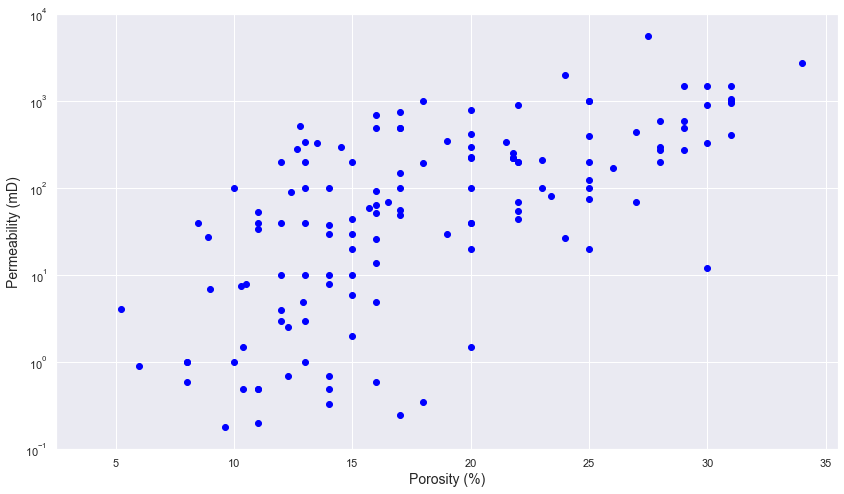

In [35]:
# Generate values for missing permeability values as a function of porosity
a = dfssgas['204_Porosity (matrix average) (%)']
b = dfssgas['210_Permeability (air average) (mD)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity (%)", size=14)
plt.ylabel("Permeability (mD)", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([0.1, 10000])
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [36]:
# Drop perm values that are 0 
dfssgas = dfssgas.drop(dfssgas[dfssgas['210_Permeability (air average) (mD)'] == 0].index)

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

cdf = dfssgas[['210_Permeability (air average) (mD)', '204_Porosity (matrix average) (%)']]
testdf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==True].fillna(0)
traindf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==False].fillna(0)

y = traindf['210_Permeability (air average) (mD)']
traindf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
ln_y = np.log(y)

lr.fit(traindf,ln_y)
testdf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred = np.exp(lr.predict(testdf))
testdf['210_Permeability (air average) (mD)'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf = testdf.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '210_Permeability (air average) (mD)': '210_RPT_Permeability (air average) (mD)'
                               })

Gradient:  [0.2791658]
Intercept:  -1.4160626676822505


In [38]:
dfssgas = pd.concat([dfssgas, testdf], axis=1)

dfssgas['210_Permeability (air average) (mD)'] = dfssgas['210_RPT_Permeability (air average) (mD)'].fillna(0) + dfssgas['210_Permeability (air average) (mD)'].fillna(0)

dfssgas = dfssgas.drop([
    '210_RPT_Permeability (air average) (mD)', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

In [39]:
dfssgas.isnull().sum().sort_values(ascending=False)

255_Condensate yield (initial average) (BC/MMCFG)    38
176_Net/gross ratio (average)                        28
118_Structural flank dip (average) (deg.)            13
293_Original in-place oil equivalent (MMBOE)          9
149_Reservoir period                                  1
161_Reservoir architecture (main)                     1
82_Drive mechanism (main)                             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
EORIOR                                                0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)             

In [40]:
dfssgas.shape

(147, 19)

In [41]:
print(dfssgas['149_Reservoir period'].value_counts())

CRETACEOUS                      36
NEOGENE                         26
JURASSIC                        21
PALEOGENE                       20
PERMIAN                         19
TRIASSIC                         4
CARBONIFEROUS                    4
DEVONIAN                         3
CRETACEOUS/JURASSIC              2
JURASSIC/TRIASSIC                2
CRETACEOUS/JURASSIC/TRIASSIC     2
PROTEROZOIC                      1
ORDOVICIAN                       1
ORDOVICIAN/CAMBRIAN              1
PERMIAN/CARBONIFEROUS            1
NEOGENE/PALEOGENE                1
PALEOGENE/CRETACEOUS             1
NEOGENE/PALEOGENE/CRETACEOUS     1
Name: 149_Reservoir period, dtype: int64


In [42]:
#dfssgas['149_Reservoir period'] = dfssgas.apply(lambda x: x.fillna(x.mode().iat[0]))
dfssgas['149_Reservoir period'] = dfssgas['149_Reservoir period'].fillna(dfssgas['149_Reservoir period'].mode()[0])

In [43]:
#dfssgas['161_Reservoir architecture (main)'] = dfssgas.apply(lambda x: x.fillna(x.mode().iat[0]))
dfssgas['161_Reservoir architecture (main)'] = dfssgas['161_Reservoir architecture (main)'].fillna(dfssgas['161_Reservoir architecture (main)'].mode()[0])

In [44]:
dfssgas.isnull().sum().sort_values(ascending=False)

255_Condensate yield (initial average) (BC/MMCFG)    38
176_Net/gross ratio (average)                        28
118_Structural flank dip (average) (deg.)            13
293_Original in-place oil equivalent (MMBOE)          9
EORIOR                                                0
82_Drive mechanism (main)                             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
149_Reservoir period                                  0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)             

count      138.000000
mean      1987.087971
std       6352.570813
min         15.000000
25%        178.500000
50%        491.915000
75%       1178.250000
max      60000.000000
Name: 293_Original in-place oil equivalent (MMBOE), dtype: float64

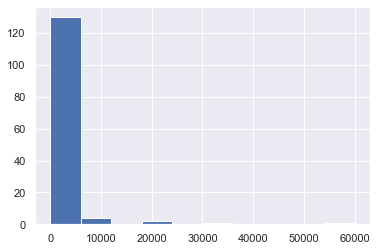

In [45]:
dfssgas['293_Original in-place oil equivalent (MMBOE)'].hist()
dfssgas['293_Original in-place oil equivalent (MMBOE)'].describe()

In [46]:
dfssgas['293_Original in-place oil equivalent (MMBOE)'] = ((dfssgas['293_Original in-place oil equivalent (MMBOE)']*1000000)*6000)/1000000000

In [47]:
dfssgas = dfssgas.rename(columns={'293_Original in-place oil equivalent (MMBOE)': '293_Original in-place gas (Bscf))'})

count       138.000000
mean      11922.527826
std       38115.424879
min          90.000000
25%        1071.000000
50%        2951.490000
75%        7069.500000
max      360000.000000
Name: 293_Original in-place gas (Bscf)), dtype: float64

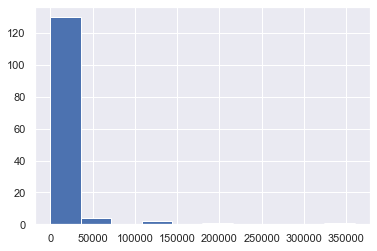

In [48]:
dfssgas['293_Original in-place gas (Bscf))'].hist()
dfssgas['293_Original in-place gas (Bscf))'].describe()

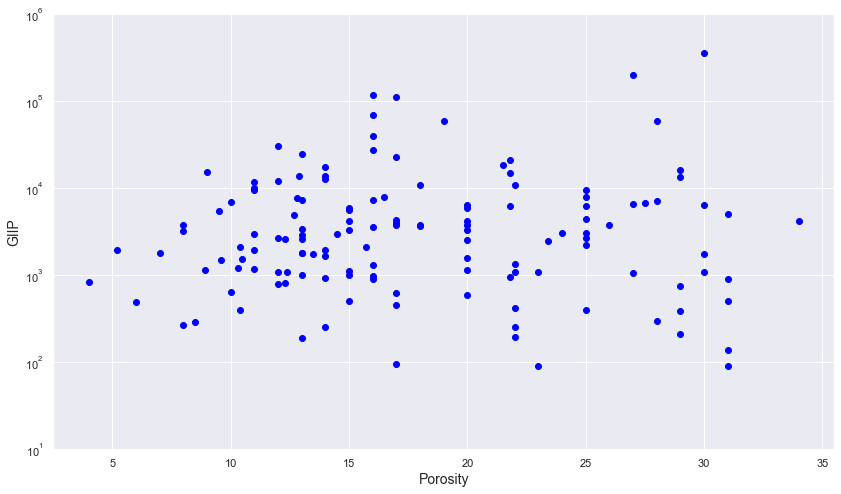

In [49]:
# Generate values for missing viscosity values as a function of API
a = dfssgas['204_Porosity (matrix average) (%)']
b = dfssgas['293_Original in-place gas (Bscf))']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("GIIP", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([10, 1000000])
#plt.ylim([0.1, 10000])
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [50]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf2 = dfssgas[['293_Original in-place gas (Bscf))', '204_Porosity (matrix average) (%)']]
testdf2 = cdf2[cdf2['293_Original in-place gas (Bscf))'].isnull()==True].fillna(0)
traindf2 = cdf2[cdf2['293_Original in-place gas (Bscf))'].isnull()==False].fillna(0)

y2 = traindf2['293_Original in-place gas (Bscf))']
traindf2.drop('293_Original in-place gas (Bscf))', axis=1, inplace=True)
ln_y2 = np.log(y2)

lr.fit(traindf2,ln_y2)
testdf2.drop('293_Original in-place gas (Bscf))', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred2 = np.exp(lr.predict(testdf2))
testdf2['293_Original in-place gas (Bscf))'] = pred2


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf2 = testdf2.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '293_Original in-place gas (Bscf))': '293_RPT_Original in-place gas (Bscf))'
                               })

Gradient:  [0.0047197]
Intercept:  7.872517800312246


In [51]:
dfssgas = pd.concat([dfssgas, testdf2], axis=1)

dfssgas['293_Original in-place gas (Bscf))'] = dfssgas['293_RPT_Original in-place gas (Bscf))'].fillna(0) + dfssgas['293_Original in-place gas (Bscf))'].fillna(0)

dfssgas = dfssgas.drop([
    '293_RPT_Original in-place gas (Bscf))', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

##### Fill missing values for Structural Flank Dip with average

In [52]:
#fill missing values for Structural Flank Dip with average
#dfssgas['118_Structural flank dip (average) (deg.)'] = dfssgas.apply(lambda x: x.fillna(x.mode().iat[0]))

mean_flankdip=dfssgas['118_Structural flank dip (average) (deg.)'].mean()
dfssgas['118_Structural flank dip (average) (deg.)'].fillna(value=mean_flankdip, inplace=True)

In [53]:
dfssgas.shape

(147, 19)

##### Fill missing values for CGR based on relationship with CGR

In [54]:
dfssgas.isnull().sum().sort_values(ascending=False)

255_Condensate yield (initial average) (BC/MMCFG)    38
176_Net/gross ratio (average)                        28
EORIOR                                                0
117_Reservoir top subsea depth (ft TVDSS)             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
82_Drive mechanism (main)                             0
149_Reservoir period                                  0
118_Structural flank dip (average) (deg.)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)                   0
293_Original in-place gas (Bscf))               

<Figure size 1440x1080 with 0 Axes>

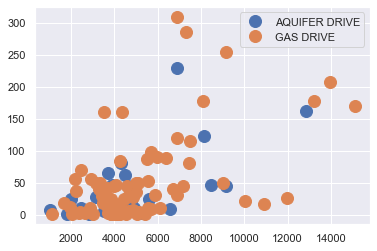

In [55]:
# Check if Drive mechanism impacts CGR
groups = dfssgas.groupby('82_Drive mechanism (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['77_Pressure (original) (psi)'], group['255_Condensate yield (initial average) (BC/MMCFG)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()


plt.show()

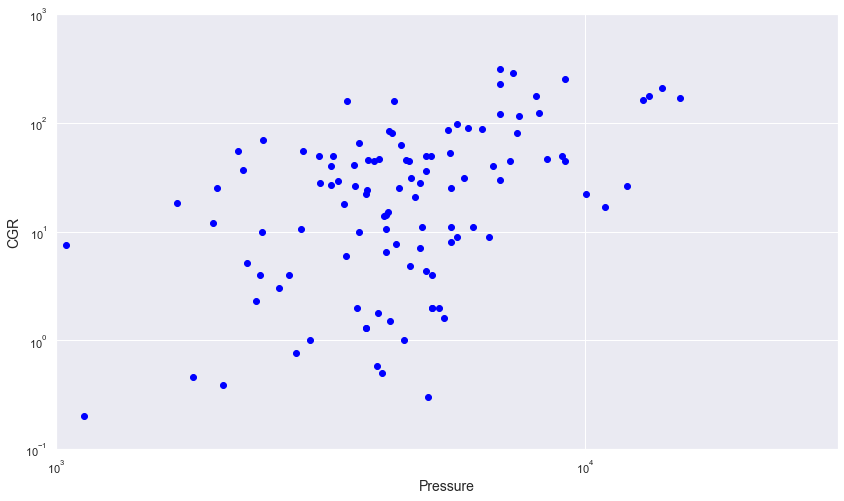

In [56]:
# Generate values for missing GOR values as a function of Pressure
a = dfssgas['77_Pressure (original) (psi)']
b = dfssgas['255_Condensate yield (initial average) (BC/MMCFG)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Pressure", size=14)
plt.ylabel("CGR", size=14)
plt.yscale('log')
plt.xscale('log')
#plt.gca().invert_yaxis()
plt.ylim([0.1, 1000])
plt.xlim([1000, 30000])

#plt.tight_layout()
plt.show()

In [57]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf3 = dfssgas[['255_Condensate yield (initial average) (BC/MMCFG)', '77_Pressure (original) (psi)']]
testdf3 = cdf3[cdf3['255_Condensate yield (initial average) (BC/MMCFG)'].isnull()==True].fillna(0)
traindf3 = cdf3[cdf3['255_Condensate yield (initial average) (BC/MMCFG)'].isnull()==False].fillna(0)

y3 = traindf3['255_Condensate yield (initial average) (BC/MMCFG)']
traindf3.drop('255_Condensate yield (initial average) (BC/MMCFG)', axis=1, inplace=True)
ln_y3 = np.log(y3)
ln_traindf3 = np.log(traindf3)

lr.fit(ln_traindf3,ln_y3)
testdf3.drop('255_Condensate yield (initial average) (BC/MMCFG)', axis=1, inplace=True)
ln_testdf3 = np.log(testdf3)
#pred = lr.predict(ln_testdf3)
pred3 = np.exp(lr.predict(ln_testdf3))
testdf3['255_Condensate yield (initial average) (BC/MMCFG)'] = pred3


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf3 = testdf3.rename(columns={'77_Pressure (original) (psi)': '77_RPT_Pressure (original) (psi)', 
                                '255_Condensate yield (initial average) (BC/MMCFG)': '255_RPT_Condensate yield (initial average) (BC/MMCFG)'
                               })

Gradient:  [1.63441005]
Intercept:  -10.901341169891168


In [58]:
dfssgas = pd.concat([dfssgas, testdf3], axis=1)

dfssgas['255_Condensate yield (initial average) (BC/MMCFG)'] = dfssgas['255_RPT_Condensate yield (initial average) (BC/MMCFG)'].fillna(0) + dfssgas['255_Condensate yield (initial average) (BC/MMCFG)'].fillna(0)

dfssgas = dfssgas.drop([
    '255_RPT_Condensate yield (initial average) (BC/MMCFG)', '77_RPT_Pressure (original) (psi)', 
], axis = 1) 

In [59]:
dfssgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        28
EORIOR                                                0
118_Structural flank dip (average) (deg.)             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
82_Drive mechanism (main)                             0
117_Reservoir top subsea depth (ft TVDSS)             0
149_Reservoir period                                  0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)                   0
255_Condensate yield (initial average) (BC/MMCFG)     0
293_Original in-place gas (Bscf))               

<Figure size 1440x1080 with 0 Axes>

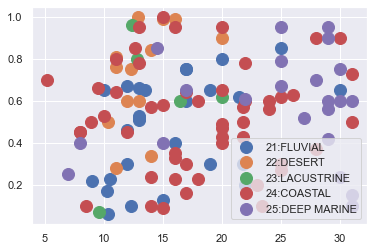

In [60]:
# Check if lithology impacts STOIIP
groups = dfssgas.groupby('153_Depositional system (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['204_Porosity (matrix average) (%)'], group['176_Net/gross ratio (average)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
#ax.set_yscale("log")

plt.show()

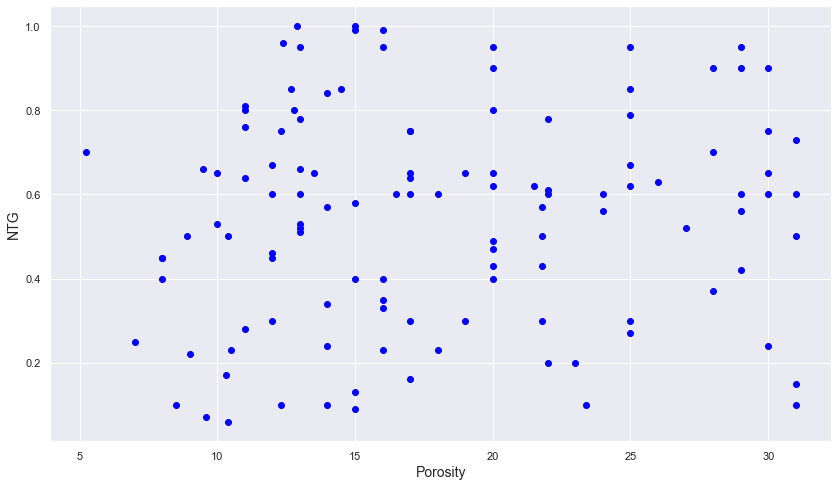

In [61]:
# Generate values for missing NTG values as a function of Porosity
a = dfssgas['204_Porosity (matrix average) (%)']
b = dfssgas['176_Net/gross ratio (average)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("NTG", size=14)
#plt.yscale('log')
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [62]:
#lr = LinearRegression()
##fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
#cdf4 = dfssgas[['176_Net/gross ratio (average)', '204_Porosity (matrix average) (%)']]
#testdf4 = cdf4[cdf4['176_Net/gross ratio (average)'].isnull()==True].fillna(0)
#traindf4 = cdf4[cdf4['176_Net/gross ratio (average)'].isnull()==False].fillna(0)

#y4 = traindf4['176_Net/gross ratio (average)']
#traindf4.drop('176_Net/gross ratio (average)', axis=1, inplace=True)
#ln_y4 = np.log(y4)

#lr.fit(traindf4,y4)
#testdf4.drop('176_Net/gross ratio (average)', axis=1, inplace=True)
#pred = lr.predict(testdf4)
#pred2 = np.exp(lr.predict(testdf2))
#testdf4['176_Net/gross ratio (average)'] = pred


#Coefficients
#print("Gradient: ", lr.coef_)
#print("Intercept: ", lr.intercept_)

#testdf4 = testdf4.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
#                                '176_Net/gross ratio (average)': '176_RPT_Net/gross ratio (average)'
#                               })

In [63]:
#dfssgas = pd.concat([dfssgas, testdf4], axis=1)#

#dfssgas['176_Net/gross ratio (average)'] = dfssgas['176_Net/gross ratio (average)'].fillna(0) + dfssgas['176_RPT_Net/gross ratio (average)'].fillna(0)

#dfssgas = dfssgas.drop([
#    '176_RPT_Net/gross ratio (average)', '204_RPT_Porosity (matrix average) (%)', 
#], axis = 1) 

In [64]:
dfssgas = dfssgas.dropna(axis=0, subset=['176_Net/gross ratio (average)'])

In [65]:
dfssgas.isnull().sum().sort_values(ascending=False)

EORIOR                                               0
118_Structural flank dip (average) (deg.)            0
11_Basin name                                        0
52_Well spacing (average) (ac)                       0
72_Onshore or offshore                               0
75_Temperature (original) (deg. F)                   0
77_Pressure (original) (psi)                         0
82_Drive mechanism (main)                            0
117_Reservoir top subsea depth (ft TVDSS)            0
149_Reservoir period                                 0
308_Recovery factor (ultimate gas) (%)               0
153_Depositional system (main)                       0
161_Reservoir architecture (main)                    0
176_Net/gross ratio (average)                        0
204_Porosity (matrix average) (%)                    0
210_Permeability (air average) (mD)                  0
255_Condensate yield (initial average) (BC/MMCFG)    0
293_Original in-place gas (Bscf))                    0
10_Region 

In [66]:
dfssgas.shape

(119, 19)

In [67]:
dfssgas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 1 to 221
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   10_Region                                          119 non-null    object 
 1   11_Basin name                                      119 non-null    object 
 2   52_Well spacing (average) (ac)                     119 non-null    float64
 3   72_Onshore or offshore                             119 non-null    object 
 4   75_Temperature (original) (deg. F)                 119 non-null    float64
 5   77_Pressure (original) (psi)                       119 non-null    float64
 6   82_Drive mechanism (main)                          119 non-null    object 
 7   117_Reservoir top subsea depth (ft TVDSS)          119 non-null    float64
 8   118_Structural flank dip (average) (deg.)          119 non-null    float64
 9   149_Reserv